<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/Homework4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

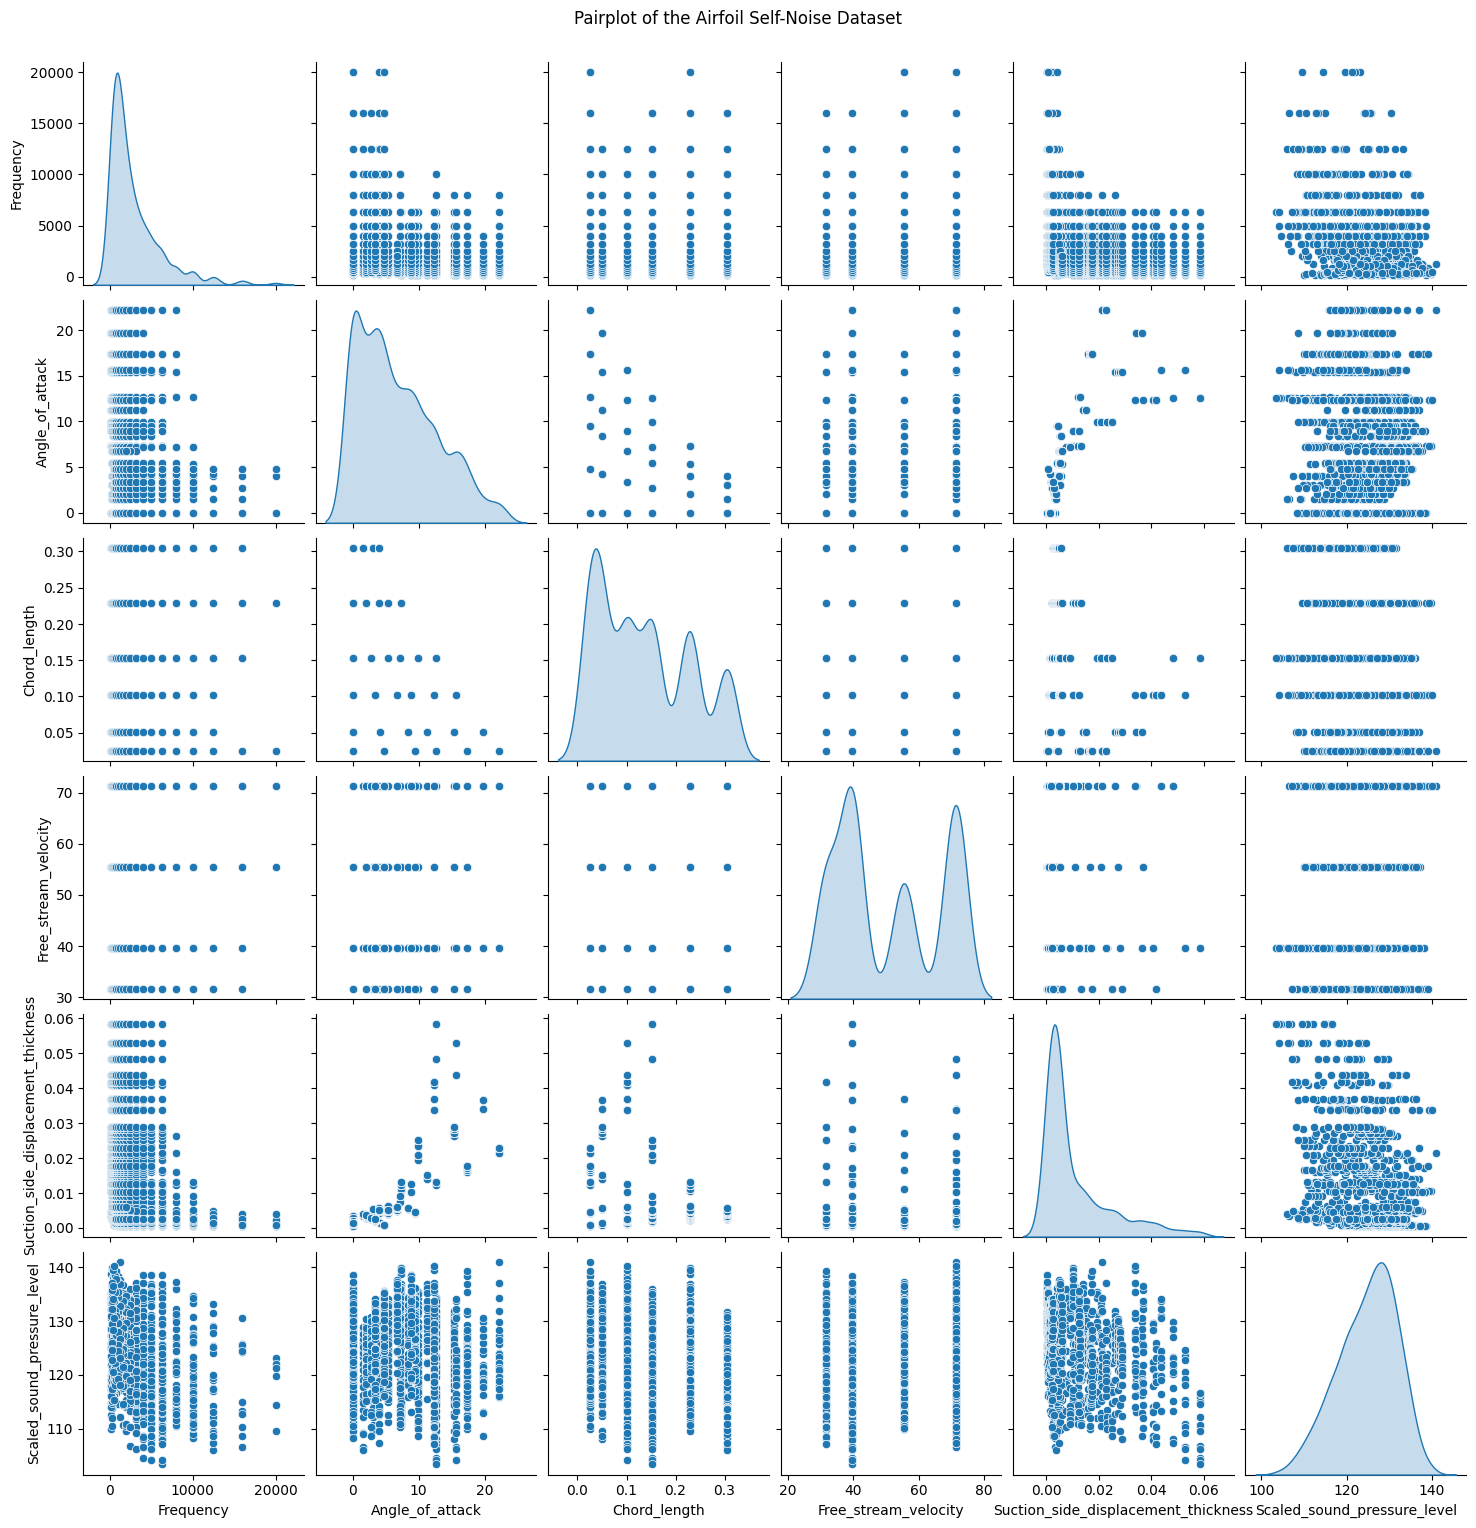

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 15625.0889 - val_loss: 15411.8164
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15376.2383 - val_loss: 14944.8857
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14742.7080 - val_loss: 13980.4482
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13554.2568 - val_loss: 12226.4678
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11517.2588 - val_loss: 9538.5391
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8687.8906 - val_loss: 6278.7612
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5396.4165 - val_loss: 3329.1677
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2834.0298 - val_loss: 1489.8845
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1348.1462 - val_loss: 742.7601
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 762.3962 - val_loss: 499.3281
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 523.4026 - val_loss: 41

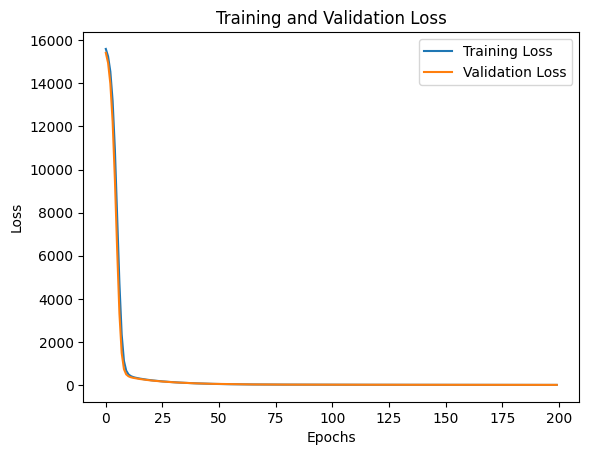

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Coefficient of determination (R^2): 0.7327


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import io
import os

# Assuming the file 'airfoil_self_noise.dat' is in the session storage
filename = 'airfoil_self_noise.dat'

# Construct the file path within the Colab session storage
file_path = os.path.join('/content', filename)

# Check if the file exists in the session storage
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File '{filename}' not found in session storage. Please upload it.")

# Read the file into a Pandas DataFrame
data = pd.read_csv(file_path, delimiter='\t', header=None,
                   names=['Frequency', 'Angle_of_attack', 'Chord_length',
                          'Free_stream_velocity', 'Suction_side_displacement_thickness',
                          'Scaled_sound_pressure_level'])

# Path to the uploaded dataset (adjust the filename if needed)
# You can find the uploaded file in the /content/ directory in the left sidebar of Colab
file_path = '/content/airfoil_self_noise.dat'  # Replace with your actual uploaded file name if different
column_names = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_displacement_thickness', 'Scaled_sound_pressure_level']

# Load the dataset
data = pd.read_csv(file_path, delimiter='\t', header=None, names=column_names)

# (a) Visualize the dataset
# Visualizing the distribution of the features and the target variable (Scaled sound pressure level)
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairplot of the Airfoil Self-Noise Dataset', y=1.02)
plt.show()

# (b) Construct a fully connected neural network model
# Prepare the data
X = data.drop('Scaled_sound_pressure_level', axis=1)
y = data['Scaled_sound_pressure_level']

# Split the dataset into training and testing sets (70%-30% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_data=(X_test_scaled, y_test))

# Plot the loss during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# (c) Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of determination (R^2): {r2:.4f}")
